# Notebook for Part 1 - Exploration and Preprocessing

In [1]:
# Import Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# 1.a) Question: Import the log and give shape

In [2]:
# load training data
heart_df = pd.read_csv('../heart_disease_data/heart_disease_raw.csv')
rows, columns = heart_df.shape

# print answer
print(f"The dataframe has {rows} rows and {columns} columns.")

The dataframe has 920 rows and 16 columns.


## 1.b) Question Basic Statistics

In [3]:
# describe, by default only numerical columns
heart_df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [4]:
# describe, with all columsn
heart_df.describe(include='all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


## 1.c) Question about the interpretation of mean of num

The target feature "num" is of ordinal nature, representing categories, therefore the metric mean is not well suited.

## 1.d) Question: Class imbalance female, male

In [5]:
# extract number of female and male participants
sex_counts = heart_df['sex'].value_counts()

# print answer
print(sex_counts)
print("Sampling approaches: Under-Sampling, Over-Sampling")

sex
Male      726
Female    194
Name: count, dtype: int64
Sampling approaches: Under-Sampling, Over-Sampling


## 1.e) Question: Distribution target feature

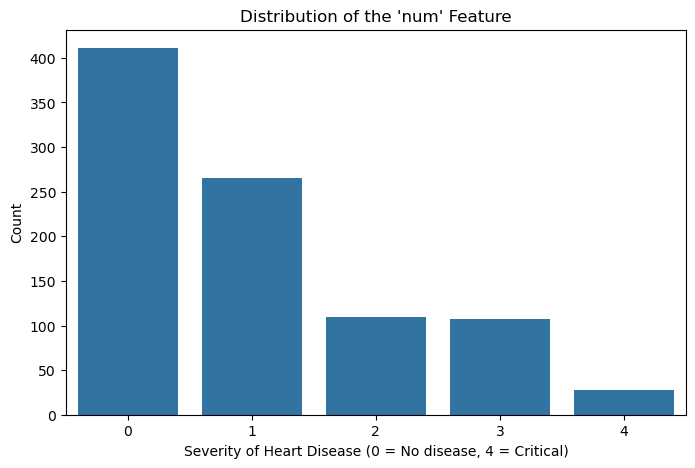

The mode of feature 'num' is: 0


In [6]:
# create plot
plt.figure(figsize=(8, 5))
sns.countplot(x='num', data=heart_df)
plt.title("Distribution of the 'num' Feature")
plt.xlabel("Severity of Heart Disease (0 = No disease, 4 = Critical)")
plt.ylabel("Count")
plt.show()

# calculate mode of feature num
num_mode = heart_df['num'].mode()

# print answer
print(f"The mode of feature 'num' is: {num_mode[0]}")

## 1.f) Question: Binning

23 bins were used for the histogram.
It is a normal (unimodal) histogram
The goal is to choose a number of bins without over- or underfitting. The bin number is chosen by Sturges' Rule.


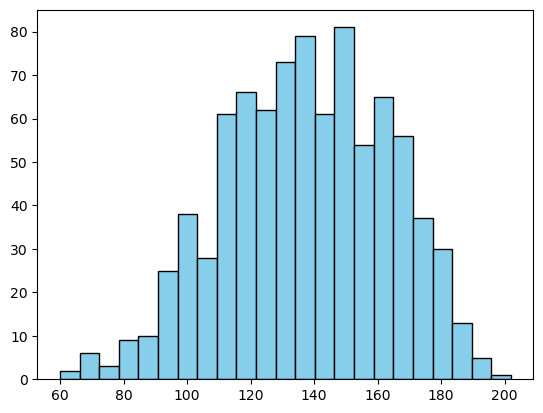

In [7]:
# calculation of number of bins needed
n = rows
num_bins = int(1 + 3.322 * np.log(n))

# create plot
plt.hist(heart_df['thalch'], bins=num_bins, color='skyblue', edgecolor='black')

# print answer
print(f"{num_bins} bins were used for the histogram.")
print("It is a normal (unimodal) histogram")
print("The goal is to choose a number of bins without over- or underfitting. The bin number is chosen by Sturges' Rule.")

## 1.g) Question: Correlation

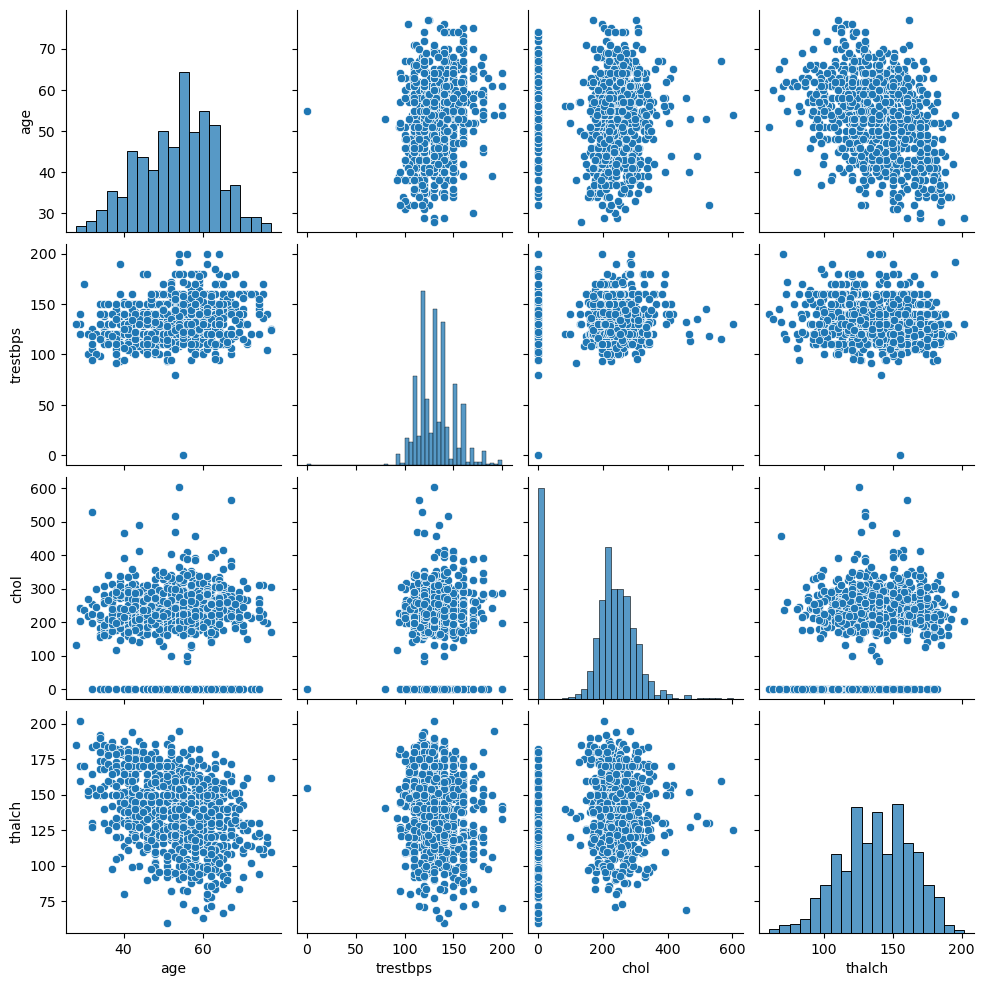

In [8]:
# create scatter plot
columns = ['age', 'trestbps', 'chol', 'thalch']
sns.pairplot(heart_df[columns])
plt.show()

## 1.h) Question: Correlation

In [9]:
# calculate correlation
columns = ['age', 'trestbps', 'chol', 'thalch']
corr = heart_df[columns].corr()

# print answer
print(corr)
print("The strongest correlation is between features age and thalch. It is a negative correlation, meaning the maximum heart rate frequency tends to decrease with increasing age.")

               age  trestbps      chol    thalch
age       1.000000  0.244253 -0.086234 -0.365778
trestbps  0.244253  1.000000  0.092853 -0.104899
chol     -0.086234  0.092853  1.000000  0.236121
thalch   -0.365778 -0.104899  0.236121  1.000000
The strongest correlation is between features age and thalch. It is a negative correlation, meaning the maximum heart rate frequency tends to decrease with increasing age.


## 1.i) Question Boxplot Interpretation
• Do males or females have a higher average cholesterol level?
Females have a higher average cholesterol level.

• Are there outliers for the male group that have values below the lower fence value?
No, there are no outliers below the lower fence for the Male group.

 • Are there more outliers for the male or female group?
This can not be answered, while it appears, that the Male group has more outliers, there is a point below the fence of the female group that contains multiple outliers. Therefore, the exact number of outliers can not be determined and there is no comparison possible.

 • Is the median of females lower than the upper end of the 3rd quartile of males?
Yes, it is lower.

## 1.j) Question: NANs per feature

In [10]:
# calculate missing values
missing_values = heart_df.isna().sum()

# print answers
print(f"missing values: \n{missing_values}")
print()
print(f"Feature {missing_values.idxmax()} has the most missing values.")
print()

# calculate upper_bound and lower_bound
upper_bound = min(missing_values.sum(), heart_df.shape[0]) 
lower_bound = missing_values.max()

# print answers
print(f"The lower bound is: {lower_bound}\nThe upper bound is: {upper_bound}")
print()
print("Explanation lower bound: Each missing value in the same column needs to be in a seperated row. Therefore, the feature with the most NaN numbers, in this case 'ca' with 611, needs 611 rows with a NaN value. The rest of the NaN values can be stored in exactly these rows.")
print()
print("Explanation upper bound: Each missing value is stored in its own row. This returns an upper bound of the sum of all NaN values. This upper bound is capped by the number of rows.")

missing values: 
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Feature ca has the most missing values.

The lower bound is: 611
The upper bound is: 920

Explanation lower bound: Each missing value in the same column needs to be in a seperated row. Therefore, the feature with the most NaN numbers, in this case 'ca' with 611, needs 611 rows with a NaN value. The rest of the NaN values can be stored in exactly these rows.

Explanation upper bound: Each missing value is stored in its own row. This returns an upper bound of the sum of all NaN values. This upper bound is capped by the number of rows.


## 1.k) Question: Simple Remove NaNs

In [11]:
# create a DataFrame without any NaN values
cleaned_heart_df = heart_df.dropna()

# get the row count of the cleaned DataFrame
cleaned_row_count = cleaned_heart_df.shape[0]

# print answers
print(f"Number of rows without any missing values: {cleaned_row_count}")

Number of rows without any missing values: 299
